# Libraries

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Importing and understanding the dataset

In [3]:
data = pd.read_csv("E:/humaiz1/main.csv")

In [4]:
data

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
0,1.609460e+12,28923.63,28961.66,28913.12,28961.66,27.457032,1.609460e+12,7.943820e+05,1292.0,16.777195,485390.8268
1,1.609460e+12,28961.67,29017.50,28961.01,29009.91,58.477501,1.609460e+12,1.695803e+06,1651.0,33.733818,978176.4682
2,1.609460e+12,29009.54,29016.71,28973.58,28989.30,42.470329,1.609460e+12,1.231359e+06,986.0,13.247444,384076.8545
3,1.609460e+12,28989.68,28999.85,28972.33,28982.69,30.360677,1.609460e+12,8.800168e+05,959.0,9.456028,274083.0751
4,1.609460e+12,28982.67,28995.93,28971.80,28975.65,24.124339,1.609460e+12,6.992262e+05,726.0,6.814644,197519.3749
...,...,...,...,...,...,...,...,...,...,...,...
188312,1.620790e+12,57517.42,57526.28,57485.00,57485.07,42.575735,1.620790e+12,2.448258e+06,1195.0,15.319691,880913.0908
188313,1.620790e+12,57485.07,57496.42,57466.75,57481.49,34.205467,1.620790e+12,1.966194e+06,1096.0,15.971891,918058.8162
188314,1.620790e+12,57477.18,57509.99,57458.18,57470.00,30.211789,1.620790e+12,1.736514e+06,955.0,13.054229,750364.5773
188315,1.620790e+12,57470.00,57470.01,57400.00,57450.90,45.354728,1.620790e+12,2.605080e+06,1559.0,12.615628,724559.2330


In [5]:
data.describe()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
count,1.883160e+05,188315.000000,188304.000000,188316.000000,188313.000000,188307.000000,1.883090e+05,1.883120e+05,188311.000000,188315.000000,1.883160e+05
mean,1.615118e+12,48807.189441,48849.935804,48764.172187,48807.373167,57.313904,1.615118e+12,2.678861e+06,1533.143088,28.284180,1.321742e+06
std,3.271327e+09,9845.605643,9843.514787,9847.762772,9845.469921,60.813028,3.271228e+09,2.696414e+06,1090.242239,32.633424,1.452644e+06
min,1.609460e+12,28241.950000,28764.230000,28130.000000,28235.470000,0.000000,1.609460e+12,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1.612280e+12,38457.420000,38496.000000,38415.000000,38458.990000,25.978224,1.612280e+12,1.266414e+06,933.000000,12.143828,5.912574e+05
50%,1.615120e+12,51800.000000,51842.320000,51752.170000,51800.000000,39.890110,1.615120e+12,1.921759e+06,1261.000000,19.136216,9.214679e+05
75%,1.617940e+12,57054.245000,57092.667500,57014.755000,57054.310000,65.678330,1.617940e+12,3.089380e+06,1771.000000,32.191851,1.518312e+06
max,1.620790e+12,64800.000000,64854.000000,64685.170000,64800.000000,1866.939050,1.620790e+12,1.046984e+08,29164.000000,1179.493861,5.568395e+07


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188317 entries, 0 to 188316
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Open Time                     188316 non-null  float64
 1   Open                          188315 non-null  float64
 2   High                          188304 non-null  float64
 3   Low                           188316 non-null  float64
 4   Close                         188313 non-null  float64
 5   Volume                        188307 non-null  float64
 6   Close Time                    188309 non-null  float64
 7   Quote asset volume            188312 non-null  float64
 8   Number of trades              188311 non-null  float64
 9   Taker buy base asset volume   188315 non-null  float64
 10  Taker buy quote asset volume  188316 non-null  float64
dtypes: float64(11)
memory usage: 15.8 MB


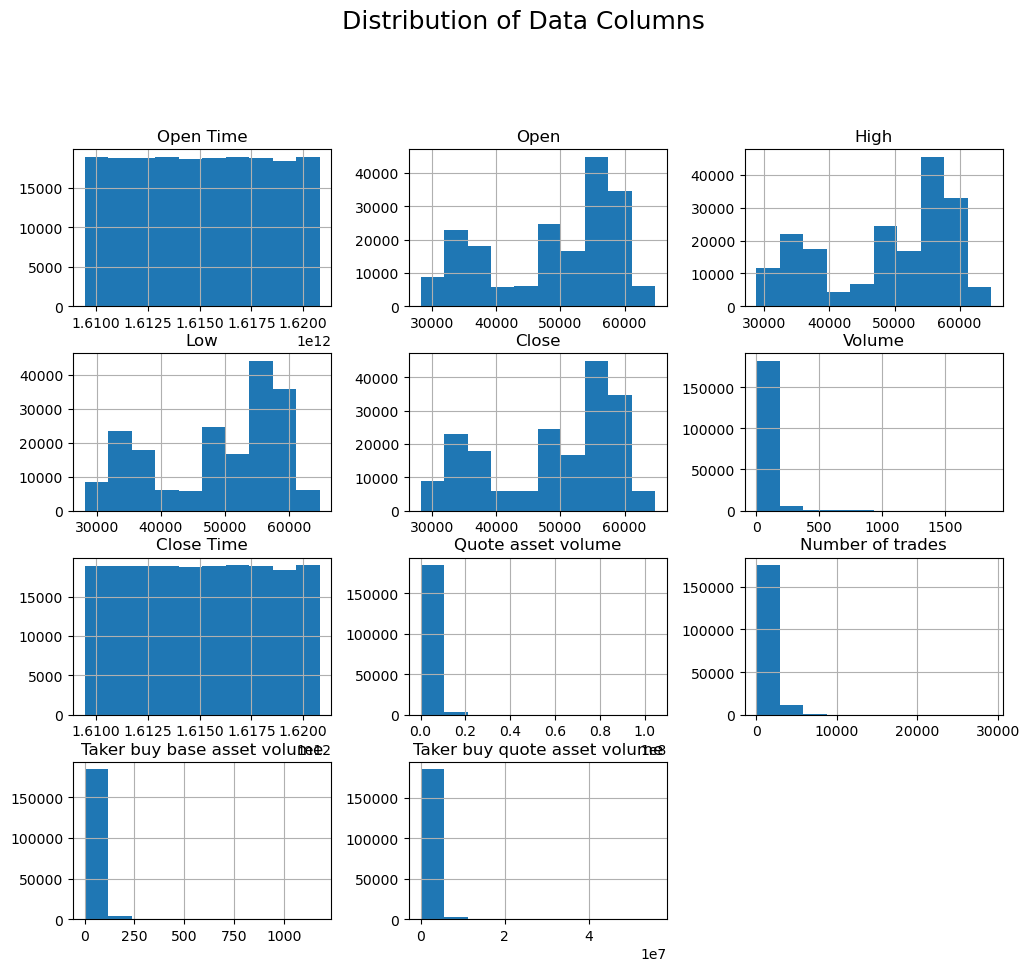

In [7]:
data.hist(figsize=(12, 10))
plt.suptitle("Distribution of Data Columns", y=1.02, size=18)
plt.show()

# Detecting and Handling Missing Values

In [8]:
data.isnull().sum()

Open Time                        1
Open                             2
High                            13
Low                              1
Close                            4
Volume                          10
Close Time                       8
Quote asset volume               5
Number of trades                 6
Taker buy base asset volume      2
Taker buy quote asset volume     1
dtype: int64

In [9]:
medians = data.median()
data.fillna(medians, inplace=True)

In [10]:
data.isnull().sum()

Open Time                       0
Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Close Time                      0
Quote asset volume              0
Number of trades                0
Taker buy base asset volume     0
Taker buy quote asset volume    0
dtype: int64

# Detecting Outliers

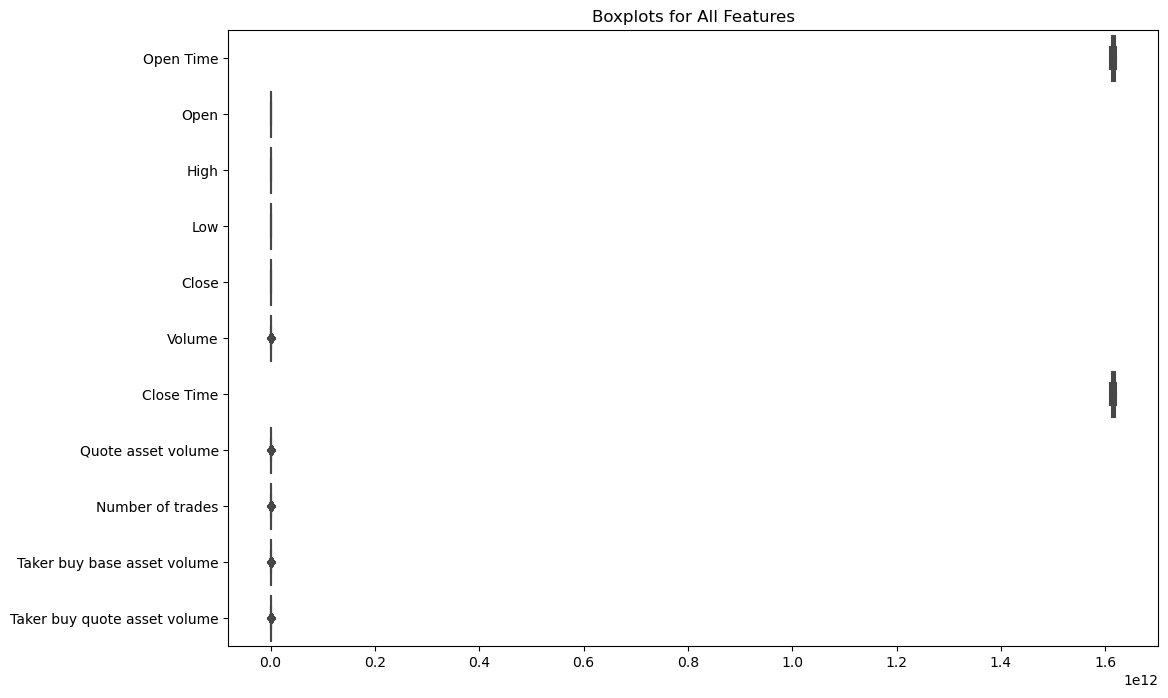

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, orient="h")
plt.title("Boxplots for All Features")
plt.show()

<Axes: xlabel='Open Time'>

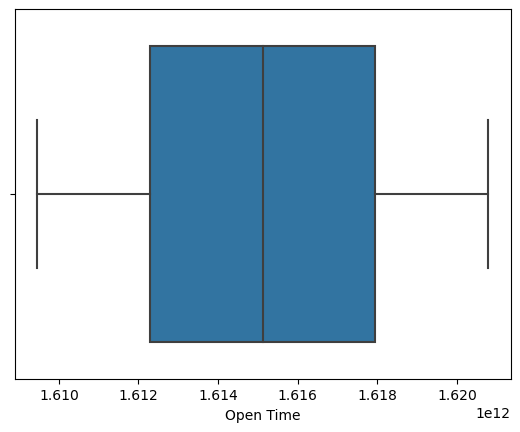

In [12]:
sns.boxplot(x=data['Open Time'])

<Axes: xlabel='Open'>

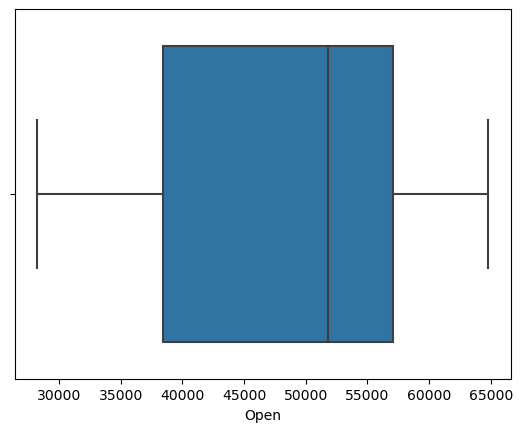

In [13]:
sns.boxplot(x=data['Open'])

<Axes: xlabel='High'>

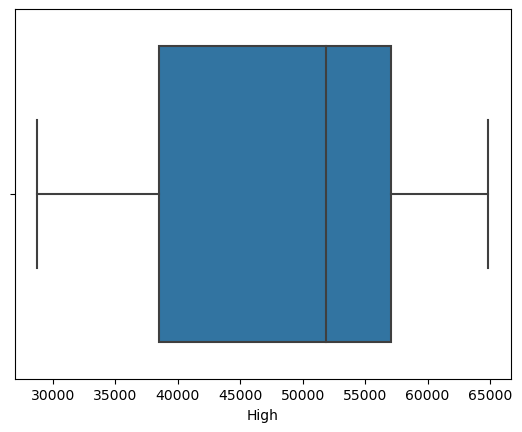

In [14]:
sns.boxplot(x=data['High'])

<Axes: xlabel='Low'>

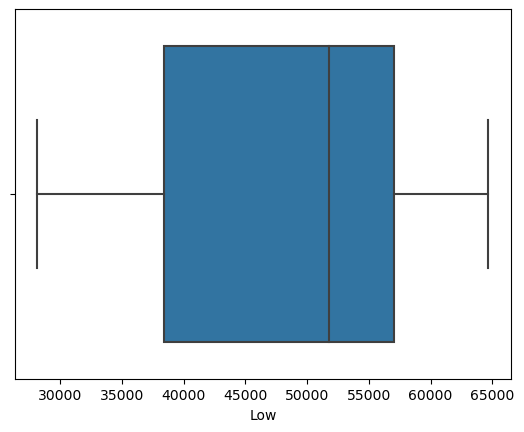

In [15]:
sns.boxplot(x=data['Low'])

<Axes: xlabel='Close'>

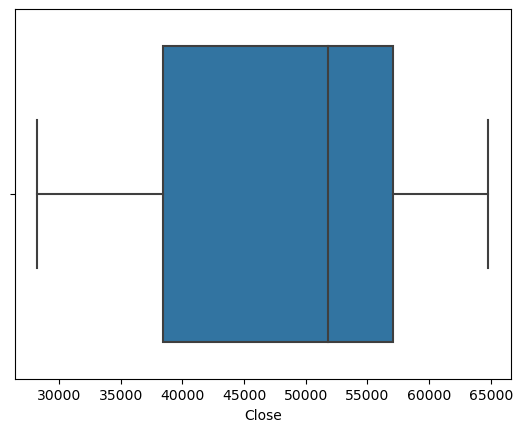

In [16]:
sns.boxplot(x=data['Close'])

<Axes: xlabel='Volume'>

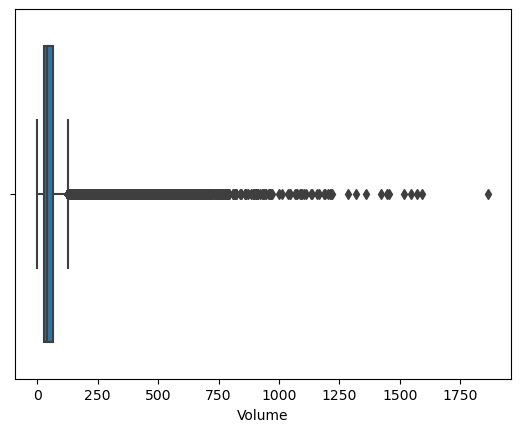

In [17]:
sns.boxplot(x=data['Volume'])

<Axes: xlabel='Close Time'>

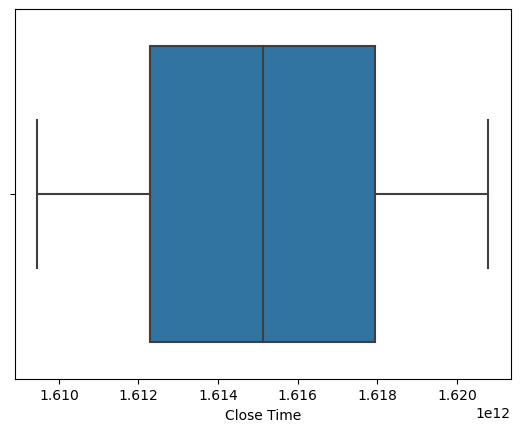

In [18]:
sns.boxplot(x=data['Close Time'])

<Axes: xlabel='Quote asset volume'>

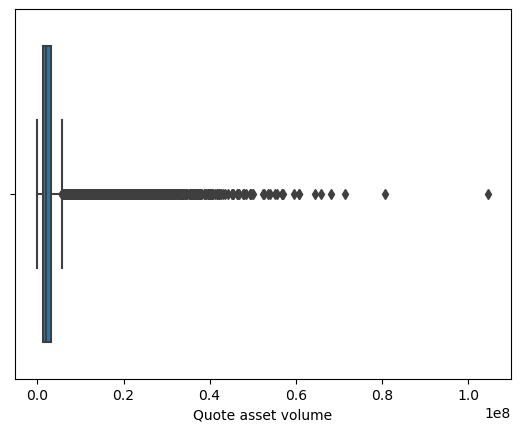

In [19]:
sns.boxplot(x=data['Quote asset volume'])

<Axes: xlabel='Number of trades'>

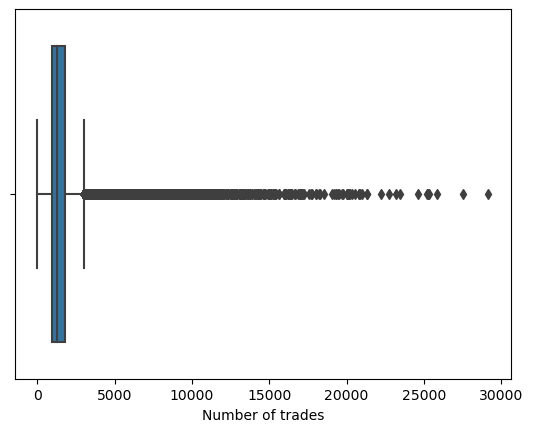

In [20]:
sns.boxplot(x=data['Number of trades'])

<Axes: xlabel='Taker buy base asset volume'>

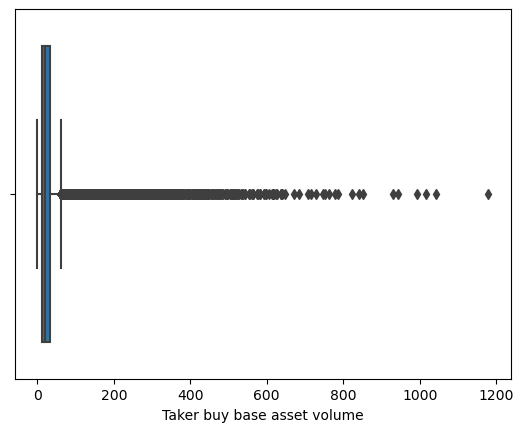

In [21]:
sns.boxplot(x=data["Taker buy base asset volume"])

<Axes: xlabel='Taker buy quote asset volume'>

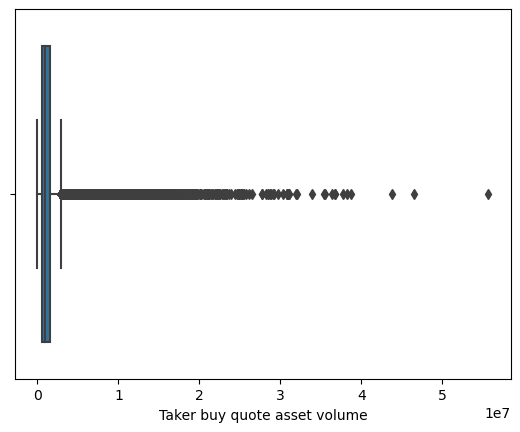

In [22]:
sns.boxplot(x=data['Taker buy quote asset volume'])

Based on the large number of outliers in 'Volume', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume' columns, we have to explore the nature of the extreme values in these columns.

# Exploratory Data Analysis (EDA)

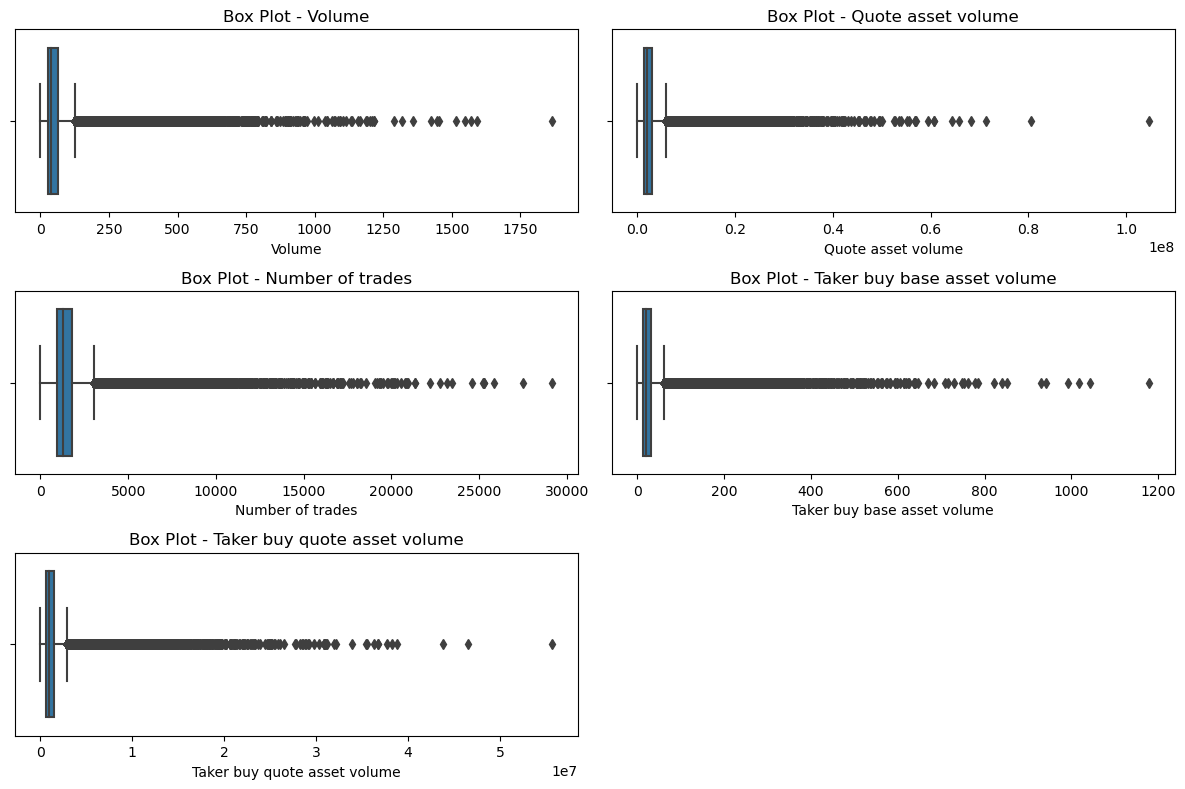

In [23]:
outlier_columns = ['Volume', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume']
num_columns = len(outlier_columns)
num_rows = (num_columns + 1) // 2
plt.figure(figsize=(12, 8))
for i, column in enumerate(outlier_columns):
    plt.subplot(num_rows, 2, i + 1) 
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot - {column}')

plt.tight_layout()
plt.show()

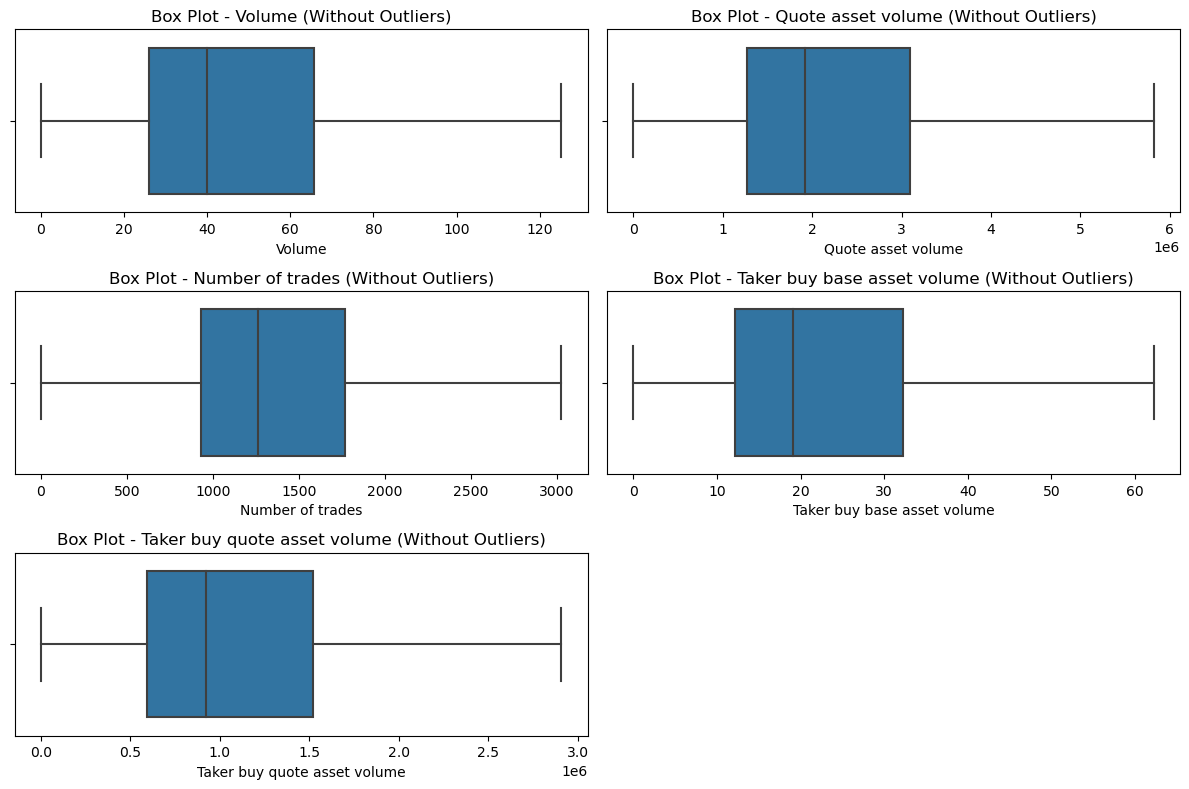

In [24]:
outlier_columns = ['Volume', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume']
num_columns = len(outlier_columns)
num_rows = (num_columns + 1) // 2
plt.figure(figsize=(12, 8))
for i, column in enumerate(outlier_columns):
    plt.subplot(num_rows, 2, i + 1)
    sns.boxplot(x=data[column], showfliers=False)
    plt.title(f'Box Plot - {column} (Without Outliers)')
plt.tight_layout()
plt.show()

By comparing the two sets of visualizations, we understand how outliers impact the overall pattern of the data. These outliers does not have a substantial effect on the distribution, rather removing or handling these outliers would result in losing the valuable data. In the context of financial data, especially for cryptocurrencies like Bitcoin, extreme values (outliers) may actually represent important information rather than errors.

# Detecting Noisy data

When we refer to "noisy data" for this dataset, we are specifically talking about data points that fall outside a certain range defined by the interquartile range (IQR). These points are commonly known as "outliers." Therefore such values won't be removed from the training dataset.

All Noisy Data Points:
           Open Time      Open      High       Low     Close      Volume  \
14      1.609460e+12  28716.85  28764.23  28690.17  28752.80  156.587294   
70      1.609460e+12  29117.19  29157.98  29115.76  29155.85  151.322379   
71      1.609460e+12  29155.86  29200.00  29149.23  29193.47  201.436205   
72      1.609460e+12  29193.46  29246.67  29187.87  29239.21  191.897707   
75      1.609460e+12  29384.97  29385.00  29296.74  29357.15  285.135915   
...              ...       ...       ...       ...       ...         ...   
188264  1.620790e+12  57679.12  57719.64  57654.26  57713.33  214.481315   
188267  1.620790e+12  57739.85  57814.14  57733.42  57785.02   92.674578   
188277  1.620790e+12  57756.95  57870.70  57755.12  57859.92   99.550159   
188278  1.620790e+12  57859.92  57900.00  57840.72  57889.65   73.089038   
188279  1.620790e+12  57887.19  58000.01  57870.82  57909.47  486.246880   

          Close Time  Quote asset volume  Number of trades  \
14

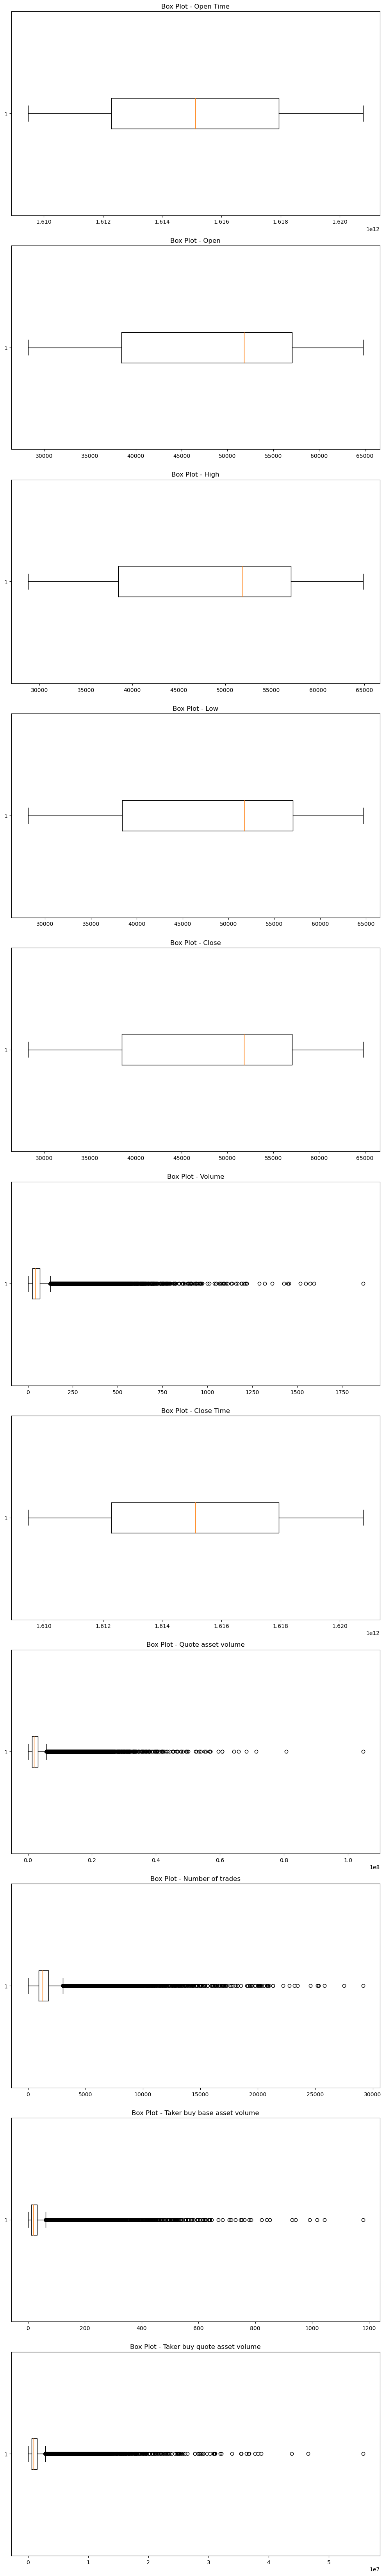

In [25]:
outlier_threshold = 1.5
fig, axes = plt.subplots(nrows=len(data.columns), ncols=1, figsize=(10, 6 * len(data.columns)))
all_noisy_data = pd.DataFrame(columns=data.columns)
for i, column in enumerate(data.columns):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    noisy_data = data[(data[column] < Q1 - outlier_threshold * IQR) | (data[column] > Q3 + outlier_threshold * IQR)]
    axes[i].boxplot(data[column], vert=False)
    axes[i].set_title(f'Box Plot - {column}')
    all_noisy_data = pd.concat([all_noisy_data, noisy_data])
print("All Noisy Data Points:")
print(all_noisy_data)
plt.tight_layout()
plt.show()

# Feature Selection (Correlation Coefficient Technique )

In [26]:
target_variable = 'Close'

In [27]:
numerical_features = data.select_dtypes(include='number').columns.tolist()

In [28]:
data_num = data[numerical_features + [target_variable]]

In [29]:
correlation_matrix = data_num.corr()

In [30]:
print(correlation_matrix)

                              Open Time      Open      High       Low  \
Open Time                      1.000000  0.855567  0.855462  0.855685   
Open                           0.855567  1.000000  0.999958  0.999985   
High                           0.855462  0.999958  1.000000  0.999951   
Low                            0.855685  0.999985  0.999951  1.000000   
Close                          0.855554  0.999963  0.999948  0.999975   
Volume                        -0.188588 -0.197823 -0.195731 -0.200297   
Close Time                     0.999935  0.855540  0.855435  0.855658   
Quote asset volume            -0.009224  0.011088  0.013250  0.008536   
Number of trades              -0.072437 -0.052305 -0.050072 -0.054944   
Taker buy base asset volume   -0.176990 -0.183445 -0.180865 -0.184982   
Taker buy quote asset volume  -0.012316  0.008817  0.011463  0.007240   
Close                          0.855554  0.999963  0.999948  0.999975   

                                 Close    Volume  

Note: 1 indicates a perfect positive correlation.
-1 indicates a perfect negative correlation.
0 indicates no correlation.

In [31]:
threshold = 0.5

In [32]:
highly_correlated_features = set()

In [33]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

In [34]:
print("Highly correlated features:", highly_correlated_features)

Highly correlated features: {'Low', 'Taker buy base asset volume', 'High', 'Number of trades', 'Open', 'Close Time', 'Quote asset volume', 'Taker buy quote asset volume', 'Close'}


# Regression Analysis (Linear Regression)

In [35]:
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = LinearRegression()

In [38]:
model.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = model.predict(X_test)

In [40]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [41]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 23.24500075969155
Mean Squared Error: 5491.837867215096
R-squared: 0.9999435545729385


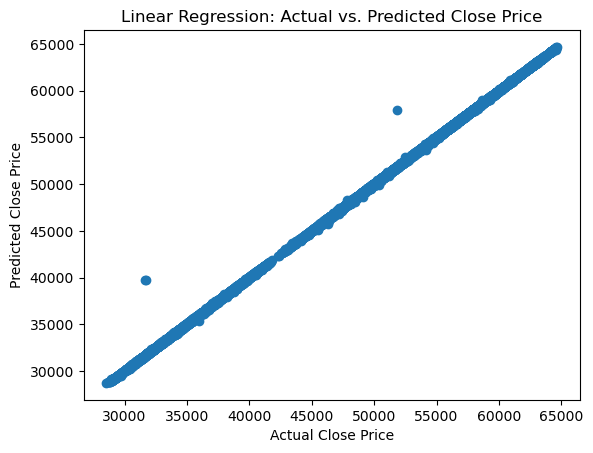

In [42]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Linear Regression: Actual vs. Predicted Close Price')
plt.show()

# Decision Tree

In [43]:
decision_tree = DecisionTreeRegressor(random_state=42)

In [44]:
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [45]:
y_pred = decision_tree.predict(X_test)

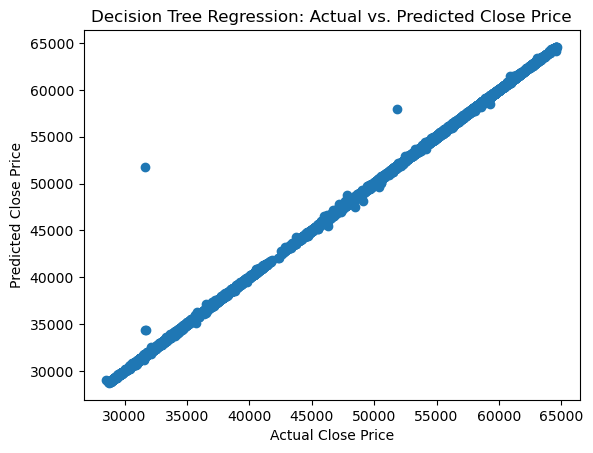

In [46]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Decision Tree Regression: Actual vs. Predicted Close Price')
plt.show()

In [47]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [48]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 28.824985928207283
Mean Squared Error: 14095.576880780049
R-squared: 0.9998551248460075


# Support Vector Machine (SVM)

In [49]:
svr = LinearSVR()

In [50]:
svr.fit(X_train, y_train)

E:\humaiz1\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
E:\humaiz1\anaconda\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR()

In [51]:
y_pred = svr.predict(X_test)

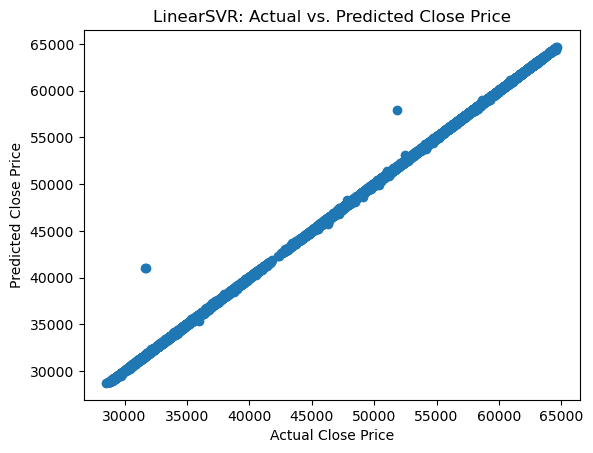

In [52]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('LinearSVR: Actual vs. Predicted Close Price')
plt.show()

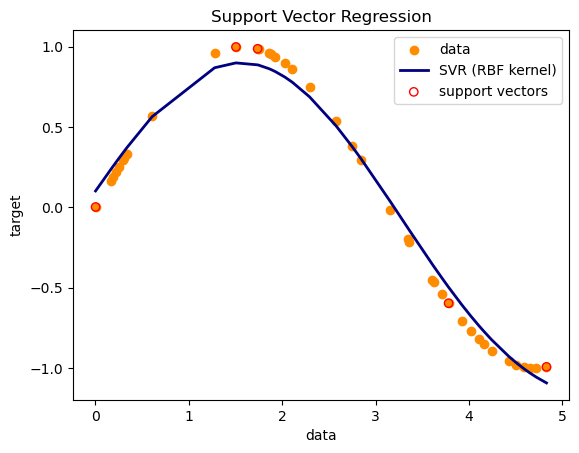

In [53]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf.fit(X, y)
y_pred = svr_rbf.predict(X)
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_pred, color='navy', lw=2, label='SVR (RBF kernel)')
plt.scatter(X[svr_rbf.support_], y[svr_rbf.support_], facecolors='none', edgecolors='r', label='support vectors')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

The red and orange points in the visualization don't represent specific values but rather the instances in the dataset that are influential in the SVR model's construction.

# Aritificial Neural Network (ANN)

Mean Absolute Error: 34.80065188964728
Mean Squared Error: 5216.561050167356
R-squared: 0.9999463838839767


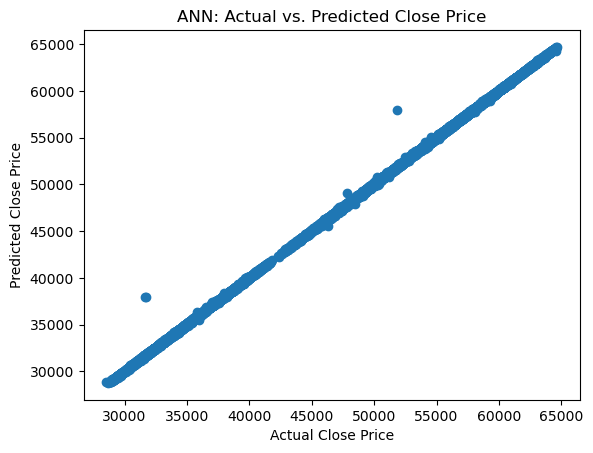

In [54]:
ann_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
ann_model.fit(X_train, y_train)
y_pred = ann_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('ANN: Actual vs. Predicted Close Price')
plt.show()

# Model Prediction

In [55]:
def predict_closing_value(user_input, model):
    relevant_features = ['Open', 'High', 'Low', 'Volume']
    user_values = np.array([user_input[feature] for feature in relevant_features]).reshape(1, -1)
    predicted_value = model.predict(user_values)
    return predicted_value[0]
def get_user_input():
    print("\nEnter values for each feature:")
    user_input = {}
    relevant_features = ['Open', 'High', 'Low', 'Volume']    
    for feature in relevant_features:
        while True:
            try:
                value = float(input(f"{feature}: "))
                user_input[feature] = value
                break
            except ValueError:
                print("Invalid input. Please enter a numeric value.")               
    return user_input
user_input = get_user_input()
prediction = predict_closing_value(user_input, model)
print("\nThe model predicts the closing value:", prediction)


Enter values for each feature:
Open: 28923.63
High: 28961.66
Low: 28913.12
Volume: 27.457032

The model predicts the closing value: 28942.51961678468


E:\humaiz1\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
